In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import seaborn as sns

# Spotify Data

In [33]:
chart = pd.read_pickle('spotify_data/charts_us_daily.pkl')
chart

,date,uri,artist_names,track_name,streams
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289
...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233


In [34]:
audio_features = pd.read_pickle('spotify_data/us_audio_features.pkl')
audio_features

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.0611,0.926,343150,0.666,0.000000,11,0.123,-5.314,1,0.2440,127.079,4,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,0.168
1,0.1050,0.928,210937,0.481,0.000000,9,0.176,-9.350,0,0.2870,134.007,4,spotify:track:343YBumqHu19cGoGARUTsd,0.613
2,0.1650,0.681,230453,0.594,0.000003,7,0.134,-7.028,1,0.2820,186.054,4,spotify:track:5aAx2yezTd8zXrkmtKl66Z,0.535
3,0.4140,0.748,244960,0.524,0.000000,8,0.111,-5.599,1,0.0338,95.010,4,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,0.661
4,0.1420,0.794,291893,0.632,0.000000,0,0.128,-6.163,1,0.0649,145.926,4,spotify:track:6fujklziTHa8uoM5OQSfIo,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10586,0.1870,0.491,169419,0.643,0.000000,10,0.109,-4.309,1,0.0442,162.469,4,spotify:track:6Um358vY92UBv5DloTRX9L,0.779
10587,0.1260,0.380,223120,0.488,0.000007,9,0.115,-6.637,1,0.0290,156.031,3,spotify:track:3fl4zil6HJ0N1FL3YIRwdC,0.268
10588,0.8590,0.735,175890,0.449,0.000000,2,0.213,-9.933,0,0.3830,146.016,4,spotify:track:3zkyus0njMCL6phZmNNEeN,0.514
10589,0.1480,0.587,199040,0.632,0.000010,9,0.158,-5.416,1,0.0311,139.974,4,spotify:track:5UNMyX2AzF8X90wAYAxG6Q,0.392


In [35]:
merged = pd.merge(chart, audio_features, how='left', on='uri')
merged

,date,uri,artist_names,track_name,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493,0.0611,0.926,343150,0.666,0.000000,11,0.1230,-5.314,1,0.2440,127.079,4,0.168
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074,0.1050,0.928,210937,0.481,0.000000,9,0.1760,-9.350,0,0.2870,134.007,4,0.613
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351,0.1650,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492,0.4140,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289,0.1420,0.794,291893,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361,0.4100,0.789,165926,0.536,0.000000,6,0.1290,-6.862,1,0.2420,81.039,4,0.437
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312,0.0361,0.772,246213,0.413,0.000000,0,0.1110,-8.193,0,0.0890,131.965,4,0.211
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369,0.2640,0.800,213400,0.585,0.000000,10,0.1530,-7.343,1,0.0924,126.058,4,0.779
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233,0.0212,0.898,153600,0.640,0.000000,5,0.0919,-8.796,0,0.2550,149.988,4,0.680


In [36]:
df = merged.groupby('date').mean()
df = df.reset_index()
df

,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-01,275695.290,0.174849,0.682195,219318.020,0.631460,0.010280,5.345,0.172110,-6.834540,0.595,0.133142,123.730195,4.010,0.507154
1,2017-01-02,244474.120,0.198050,0.676540,223566.330,0.610385,0.007649,5.215,0.159602,-6.780690,0.560,0.141110,121.742455,3.985,0.442366
2,2017-01-03,275844.070,0.198134,0.674955,222978.725,0.608545,0.007650,5.235,0.155095,-6.810895,0.555,0.140436,121.535735,3.985,0.439141
3,2017-01-04,279699.470,0.202646,0.675850,222926.035,0.606130,0.007649,5.215,0.156017,-6.836490,0.555,0.142561,121.886265,3.985,0.437441
4,2017-01-05,281175.620,0.199213,0.679165,223006.955,0.609325,0.007618,5.215,0.158836,-6.770560,0.555,0.146078,122.266465,3.985,0.442275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,2022-12-23,639124.345,0.435715,0.587360,185662.295,0.519293,0.013357,5.165,0.202814,-8.807545,0.760,0.079477,119.934625,3.855,0.506791
2183,2022-12-24,807570.805,0.503029,0.559850,183334.840,0.493444,0.016747,4.970,0.202584,-9.239150,0.785,0.068537,122.075040,3.815,0.525138
2184,2022-12-25,983287.510,0.561597,0.530840,182859.635,0.456983,0.031556,4.780,0.206994,-10.070315,0.815,0.062073,120.122735,3.800,0.536399
2185,2022-12-26,411703.320,0.372856,0.613145,192940.245,0.540455,0.019938,5.455,0.187094,-8.421880,0.680,0.088761,122.411895,3.880,0.479222


<AxesSubplot:xlabel='date'>

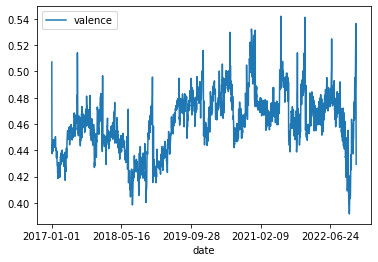

In [37]:
df.plot(x='date', y='valence', kind='line')

In [38]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              2187 non-null   datetime64[ns]
 1   streams           2187 non-null   float64       
 2   acousticness      2187 non-null   float64       
 3   danceability      2187 non-null   float64       
 4   duration_ms       2187 non-null   float64       
 5   energy            2187 non-null   float64       
 6   instrumentalness  2187 non-null   float64       
 7   key               2187 non-null   float64       
 8   liveness          2187 non-null   float64       
 9   loudness          2187 non-null   float64       
 10  mode              2187 non-null   float64       
 11  speechiness       2187 non-null   float64       
 12  tempo             2187 non-null   float64       
 13  time_signature    2187 non-null   float64       
 14  valence           2187 n

In [39]:
test = df.iloc[7:14, :]
test.mean()

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_82814/1240839068.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.mean()


streams             293409.487143
acousticness             0.209622
danceability             0.680016
duration_ms         222590.459286
energy                   0.611083
instrumentalness         0.008922
key                      5.108571
liveness                 0.162923
loudness                -6.690543
mode                     0.568571
speechiness              0.144263
tempo                  121.839189
time_signature           3.992143
valence                  0.445364
dtype: float64

In [40]:
df.set_index('date', inplace=True)
weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()
weekly_df = weekly_df.reset_index()
weekly_df = weekly_df.iloc[:-2, :]
weekly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_82814/3993231805.py:2: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()


,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-07,274957.725000,0.199451,0.678136,222818.768571,0.611036,0.008058,5.215714,0.160939,-6.798274,0.564286,0.141912,122.051256,3.990000,0.450447
1,2017-01-14,293409.487143,0.209622,0.680016,222590.459286,0.611083,0.008922,5.108571,0.162923,-6.690543,0.568571,0.144263,121.839189,3.992143,0.445364
2,2017-01-21,298598.352857,0.204695,0.681625,223133.477143,0.610969,0.008538,5.102857,0.162393,-6.662102,0.586429,0.147719,122.024264,3.990000,0.444405
3,2017-01-28,303346.843571,0.203175,0.685446,222548.520714,0.616126,0.007737,5.050714,0.161694,-6.567819,0.597143,0.149756,122.827694,3.992143,0.444522
4,2017-02-04,318830.679286,0.200754,0.687161,222704.521429,0.621949,0.007891,5.120714,0.165934,-6.470991,0.587143,0.148415,122.980359,3.995714,0.438982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2022-11-19,441424.546429,0.283860,0.639744,203339.553571,0.564391,0.026785,5.332857,0.173963,-7.722780,0.657143,0.109392,122.880699,3.910000,0.414541
307,2022-11-26,409545.130714,0.320016,0.627029,198973.428571,0.553904,0.024688,5.352857,0.175255,-8.138209,0.678571,0.101401,122.944777,3.901429,0.445472
308,2022-12-03,467009.413571,0.333944,0.621561,196330.993571,0.547081,0.021377,5.323571,0.186131,-8.324961,0.692143,0.097725,123.443685,3.890000,0.452017
309,2022-12-10,552191.642143,0.336226,0.616893,195403.864286,0.552735,0.018768,5.246429,0.195838,-8.173394,0.682143,0.098950,123.427412,3.876429,0.451449


In [12]:
# weekly_df.set_index('date', inplace=True)
# offset = weekly_df.shift(-4)
# offset = offset[:-4]
# offset = offset.reset_index()
# offset

,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-07,318830.679286,0.200754,0.687161,222704.521429,0.621949,0.007891,5.120714,0.165934,-6.470991,0.587143,0.148415,122.980359,3.995714,0.438982
1,2017-01-14,319008.535714,0.212029,0.682670,222267.946429,0.619728,0.007597,5.160000,0.165962,-6.500239,0.577857,0.147220,122.444206,3.987143,0.432057
2,2017-01-21,328031.807143,0.205835,0.679081,225130.465714,0.607323,0.006652,5.086429,0.160111,-6.602920,0.592857,0.152276,123.983386,3.986429,0.425272
3,2017-01-28,335423.047143,0.192331,0.692183,224337.709286,0.606624,0.007445,5.057143,0.160231,-6.620221,0.580714,0.158071,124.803856,3.992857,0.426935
4,2017-02-04,349281.258571,0.203019,0.687304,226306.267857,0.603059,0.009086,4.947143,0.154394,-6.609550,0.577857,0.152635,123.283829,3.990714,0.424158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2022-11-05,467009.413571,0.333944,0.621561,196330.993571,0.547081,0.021377,5.323571,0.186131,-8.324961,0.692143,0.097725,123.443685,3.890000,0.452017
305,2022-11-12,552191.642143,0.336226,0.616893,195403.864286,0.552735,0.018768,5.246429,0.195838,-8.173394,0.682143,0.098950,123.427412,3.876429,0.451449
306,2022-11-19,583588.755714,0.370521,0.609327,191572.951429,0.544623,0.017243,5.204286,0.194649,-8.373694,0.702143,0.094941,122.958556,3.867143,0.474229
307,2022-11-26,607633.620000,0.419815,0.591870,189427.111429,0.525220,0.017026,5.238571,0.195961,-8.714673,0.731429,0.082586,122.504536,3.843571,0.497535


<AxesSubplot:xlabel='date'>

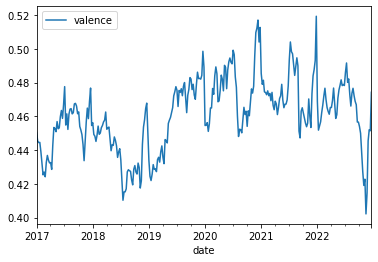

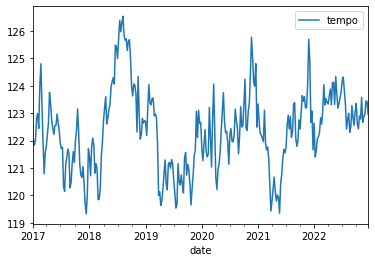

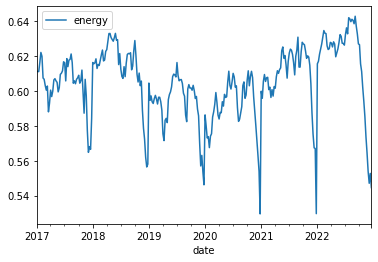

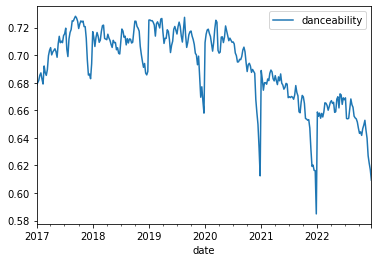

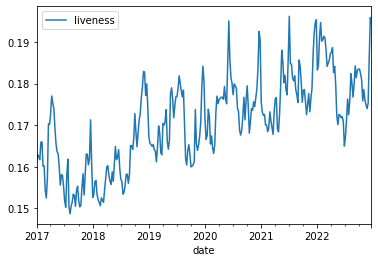

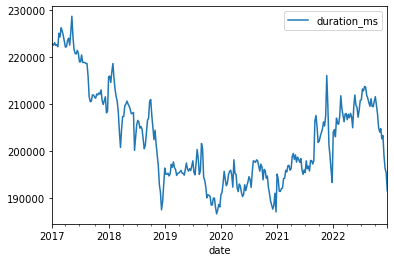

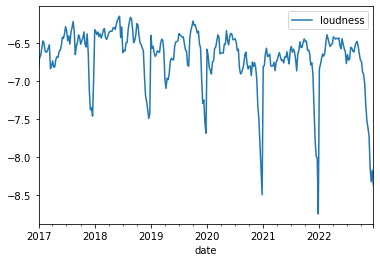

In [41]:
weekly_df.plot(x='date', y='valence', kind='line')
weekly_df.plot(x='date', y='tempo', kind='line')
weekly_df.plot(x='date', y='energy', kind='line')
weekly_df.plot(x='date', y='danceability', kind='line')
weekly_df.plot(x='date', y='liveness', kind='line')
weekly_df.plot(x='date', y='duration_ms', kind='line')
weekly_df.plot(x='date', y='loudness', kind='line')

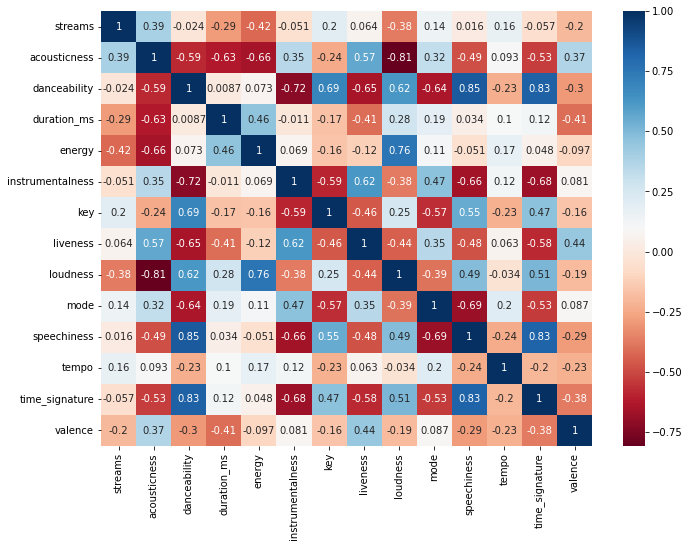

In [72]:
corr = weekly_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

# Economic data

In [42]:
wei = pd.read_csv('economic_indicators/weekely_economic_index.csv')
wei

,DATE,WEI
0,2017-01-07,1.61
1,2017-01-14,1.85
2,2017-01-21,1.12
3,2017-01-28,2.18
4,2017-02-04,2.55
...,...,...
306,2022-11-19,1.39
307,2022-11-26,1.64
308,2022-12-03,1.30
309,2022-12-10,0.72


In [43]:
wei['DATE'] = pd.to_datetime(wei['DATE'])
wei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    311 non-null    datetime64[ns]
 1   WEI     311 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


<AxesSubplot:xlabel='DATE'>

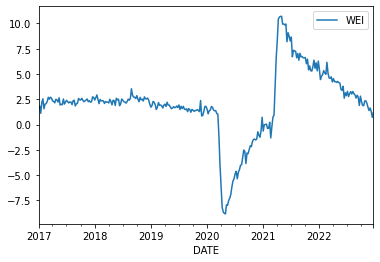

In [44]:
wei.plot(x='DATE', y='WEI', kind='line')

In [84]:
x = weekly_df[['valence']]
x = sm.add_constant(x)
y = wei[['WEI']]

model = sm.OLS(y, x).fit()

ValueError: The indices for endog and exog are not aligned

In [85]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     26.38
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.31e-15
Time:                        17:32:42   Log-Likelihood:                -776.26
No. Observations:                 311   AIC:                             1561.
Df Residuals:                     307   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          124.2596     19.158      6.486   

In [83]:
x = offset[['valence']]
x = sm.add_constant(x)
wei = wei[:-1]
y = wei[['WEI']]

model = sm.OLS(y, x).fit()

ValueError: The indices for endog and exog are not aligned

In [131]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.808
Date:                Thu, 29 Dec 2022   Prob (F-statistic):             0.0519
Time:                        22:06:06   Log-Likelihood:                -807.87
No. Observations:                 310   AIC:                             1620.
Df Residuals:                     308   BIC:                             1627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0588      4.084      2.463      0.0

In [135]:
x = offset[['valence']]
x = sm.add_constant(x)
wei = wei[:-2]
y = wei[['WEI']]

model = sm.OLS(y, x).fit()

In [136]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.824
Date:                Thu, 29 Dec 2022   Prob (F-statistic):             0.0514
Time:                        22:07:00   Log-Likelihood:                -805.66
No. Observations:                 309   AIC:                             1615.
Df Residuals:                     307   BIC:                             1623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0985      4.093      2.467      0.0

In [146]:
x = weekly_df[['energy']]
x = sm.add_constant(x)
y = wei[['WEI']]

model = sm.OLS(y, x).fit()

In [147]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     30.15
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           8.34e-08
Time:                        22:24:20   Log-Likelihood:                -797.45
No. Observations:                 311   AIC:                             1599.
Df Residuals:                     309   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.9418      5.291     -5.092      0.0

In [159]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['danceability']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     40.88
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           5.97e-10
Time:                        23:55:14   Log-Likelihood:                 695.81
No. Observations:                 311   AIC:                            -1388.
Df Residuals:                     309   BIC:                            -1380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6975      0.002    400.538      0.0

In [158]:
x = weekly_df[['tempo']]
x = sm.add_constant(x)
y = wei[['WEI']]

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5842
Date:                Thu, 29 Dec 2022   Prob (F-statistic):              0.445
Time:                        23:53:19   Log-Likelihood:                -811.63
No. Observations:                 311   AIC:                             1627.
Df Residuals:                     309   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0668     15.665      0.898      0.3

In [81]:
X = weekly_df[['tempo','valence', 'danceability']]
X = sm.add_constant(X)
y = wei[['WEI']]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WEI   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     26.38
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           3.31e-15
Time:                        17:18:29   Log-Likelihood:                -776.26
No. Observations:                 311   AIC:                             1561.
Df Residuals:                     307   BIC:                             1575.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          124.2596     19.158      6.486   

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Display the results
vif

,VIF Factor,features
0,991.229950,tempo
1,405.985567,valence
2,519.003264,danceability


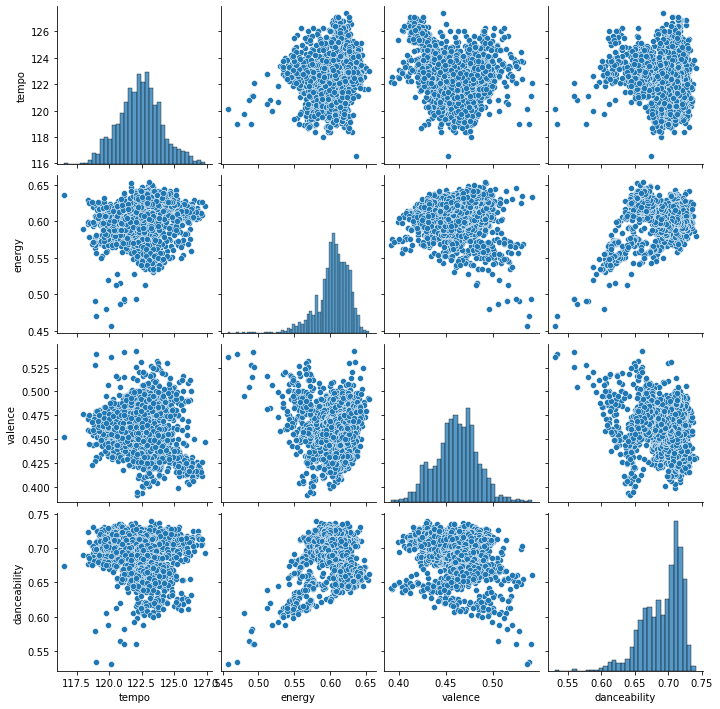

In [67]:
import seaborn as sns

# Create a pairplot of the independent variables
sns.pairplot(data=df, x_vars=X.columns, y_vars=X.columns)

array([[<AxesSubplot:xlabel='valence', ylabel='valence'>,
        <AxesSubplot:xlabel='tempo', ylabel='valence'>],
       [<AxesSubplot:xlabel='valence', ylabel='tempo'>,
        <AxesSubplot:xlabel='tempo', ylabel='tempo'>]], dtype=object)

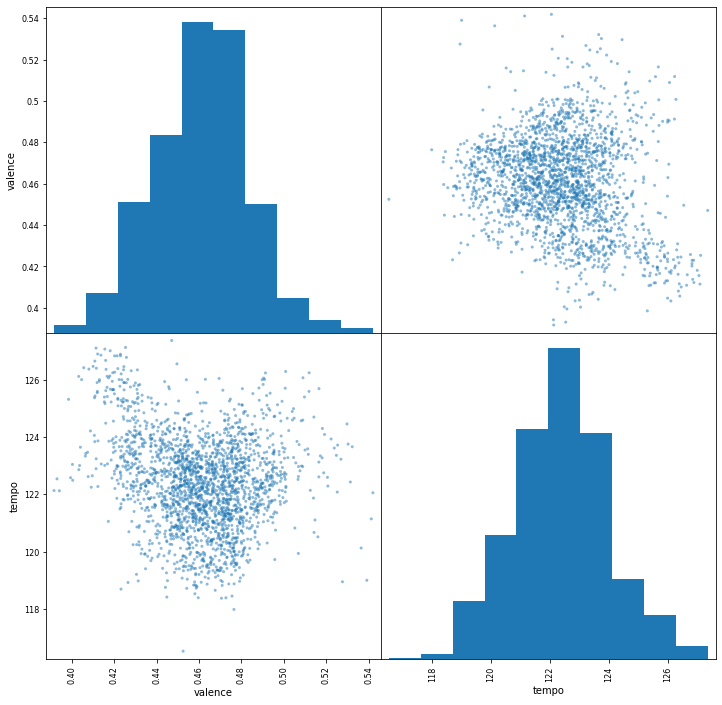

In [62]:
pd.plotting.scatter_matrix(df[X.columns], figsize=(12, 12))